In [22]:
using CmdStan, Distributions, Dates, CairoMakie
using DataFrames, CSV, Query

In [11]:
ENV["JULIA_CMDSTAN_HOME"]="/Users/marlinfiggins/cmdstan/"

"/Users/marlinfiggins/cmdstan/"

In [12]:
include("../src/BayesTS/BayesTS.jl")
using .BayesTS

In [45]:
# Load helper functions 
include("../src/BayesTShelpers.jl")
include("../src/DataHelpers.jl")
include("../src/InferenceHelpers.jl")
include("../src/lifetimes.jl")
include("../src/PlotFunctions.jl")
include("../src/PosteriorHelpers.jl")

parse_by_deme

In [14]:
df = DataFrame(CSV.File("../data/raw/cases-lineage-sequence-counts-2021-09-23.tsv"))

,state,date,cases,sequences_total,sequences_other,sequences_B.1.1.7
,String,Date,Int64,Int64,Int64,Int64
1,Alabama,2021-01-28,2340,0,0,0
2,Alabama,2021-01-29,1967,5,5,0
3,Alabama,2021-01-30,1253,0,0,0
4,Alabama,2021-01-31,1228,1,1,0
5,Alabama,2021-02-01,2476,15,13,1
6,Alabama,2021-02-02,1997,17,17,0
7,Alabama,2021-02-03,1742,1,0,1
8,Alabama,2021-02-04,1649,2,2,0
9,Alabama,2021-02-05,1582,39,37,1


In [15]:
g = generation_time(20, 5.0, 0.3)
onset = onset_time(20, 4.5, 0.6, 0.8)

20-element Vector{Float64}:
 0.15422107788295136
 0.5979776824957601
 0.8
 0.7462640695453
 0.6021072988929602
 0.45527929483634866
 0.33419359901772533
 0.24227494594996882
 0.175034123856333
 0.12664182163034848
 0.09201514722705773
 0.06723952335640869
 0.049455997273909
 0.0366271997771212
 0.02731671924777422
 0.020515169042784314
 0.015512579078432101
 0.011807873345391351
 0.009045677113215203
 0.006972500059309538

In [16]:
num_SoI = size(filter(row -> row.state == "Washington", df), 1)
seed_L = 14
forecast_L = 0

0

In [17]:
# Choose Basis Model
model = SplineTrend(20,  num_SoI, 4)
prior_model = [["LAS"]]

1-element Vector{Vector{String}}:
 ["LAS"]

In [24]:
states_dict = process_all_states("../src/stan_models/Rt_Structured_lineage.stan", df, 
    g, onset, 
    seed_L, forecast_L, 
    model; priors = prior_model, 
    model_name = "rt-lineage-all-states-09-23-21")


File /Users/marlinfiggins/Documents/rt-from-frequency-dynamics/data/sims/rt-lineage-all-states-09-23-21/Alabama/rt-lineages-Alabama.stan will be updated.


File /Users/marlinfiggins/Documents/rt-from-frequency-dynamics/data/sims/rt-lineage-all-states-09-23-21/Alaska/rt-lineages-Alaska.stan will be updated.


File /Users/marlinfiggins/Documents/rt-from-frequency-dynamics/data/sims/rt-lineage-all-states-09-23-21/Arizona/rt-lineages-Arizona.stan will be updated.


File /Users/marlinfiggins/Documents/rt-from-frequency-dynamics/data/sims/rt-lineage-all-states-09-23-21/Arkansas/rt-lineages-Arkansas.stan will be updated.


File /Users/marlinfiggins/Documents/rt-from-frequency-dynamics/data/sims/rt-lineage-all-states-09-23-21/California/rt-lineages-California.stan will be updated.


File /Users/marlinfiggins/Documents/rt-from-frequency-dynamics/data/sims/rt-lineage-all-states-09-23-21/Colorado/rt-lineages-Colorado.stan will be updated.


File /Users/marlinfiggins/Documents/rt-from-frequency-d

Dict{Any, Any} with 46 entries:
  "Colorado"       => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Texas"          => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Alabama"        => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Vermont"        => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Missouri"       => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Wyoming"        => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "California"     => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Maine"          => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "New_Mexico"     => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Tennessee"      => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Nevada"         => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.1.…
  "Kentucky"       => Dict{String, Any}("seq_labels"=>SubString{String}["B.1.

# Plot aes

In [30]:
lineage_colors =["#2e5eaa", "#5adbff", "#b4c5e4","#f5bb00","#56e39f", "#9e4244", "#f03a47", "#808080"] 

alphas = [0.65, 0.45, 0.35]
ps = [0.5 0.8 0.95]
lQuants = 0.5 * (1. .- ps)
uQuants = 0.5 * (1. .+ ps)

1×2 Matrix{Float64}:
 0.5  0.8

## Loading states

In [31]:
states_to_plot = ["Washington", "Michigan", "New_York", "Hawaii",  "Louisiana", "Florida"]
#states_to_plot = collect(keys(states_dict))

6-element Vector{String}:
 "Washington"
 "Michigan"
 "New_York"
 "Hawaii"
 "Louisiana"
 "Florida"

In [32]:
for s in states_to_plot
    load_state_samples!(s, states_dict)
    println("Loaded state $s")
end

Loaded state Washington
Loaded state Michigan
Loaded state New_York
Loaded state Hawaii
Loaded state Louisiana
Loaded state Florida


# Plot functions

In [ ]:
function plot_EC(SoI, states_dict)
    EC = get_posterior(states_dict, SoI, "C_total.", false)
    EC = vcat(hcat(EC...))
    med = median(EC, dims = 2)
    lQ = vcat([quantile(vi, lQuants) for vi in eachrow(EC)]...)
    uQ = vcat([quantile(vi, uQuants) for vi in eachrow(EC)]...) 

    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (1280, 800), fontsize = 24)
    ax = fig[1, 1] = Axis(fig,ylabel = "Posterior Expected Cases")

    barplot!(ax, dates_num, states_dict[SoI]["stan_data"]["cases"], color = "grey")
    # Plot credible intervals
    for i in reverse(1:length(ps))
        band!(ax, dates_num, 
            lQ[:,i],  uQ[:,i], 
            color = (:purple, alphas[i]), 
            label = "$(Int(ps[i] * 100))% CI")
    end

    # Add median
    lines!(ax, dates_num,med[:,1], color = "black", linewidth = 1.5, label = "Median")

    #
    ax.xticks = 1:31:(length(dates_num)-1)
    ax.xtickformat = xs -> Dates.format.(dates[convert.(Int, xs)], "m/d/Y")

    fig
end

## Preprint Figures

## Figure 1: Synthetic Data

Going to need to load samples and synthetic data

In [ ]:

# Subfigure 1: Case data colored by actual identity with population R_t same axis

# Subfigure 2: Just the case data

# Subfigure 3: Sequence samples colored by lineage

# Subfigure 4: Inferred lineage Rt versus truth

# Subfigure 5: Inferred lineage infections versus truth

# Subfigure 6:

In [ ]:
function make_fig_1(SoI, states_dict)
    
end

## Figure 2: Washington State Outbreak

In [53]:
function make_fig_2(SoI, states_dict, pred)
    seq_labels, dates, dates_num, seed_L = unpack_params(SoI, states_dict)
    lineage_map = get_sequence_map(seq_labels)
    WHO_seq_names = [lineage_to_WHO[lineage] for lineage in seq_labels]
    
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (1800, 1800), fontsize = 32, font = "Helvetica")

    # Posterior smooth prevalence 
    #TODO: Replace with EC_smooth
    g_smooth = fig[1:4,1] = GridLayout()
    ax_smooth = Axis(g_smooth[1,1], ylabel = "Posterior Smoothed Cases")
    
    EC_smooth = get_posterior(states_dict, SoI, "EC_smooth.", false)
    EC_smooth = vcat(hcat(EC_smooth...))
    med = median(EC_smooth, dims = 2)
    lQ = vcat([quantile(vi, lQuants) for vi in eachrow(EC_smooth)]...)
    uQ = vcat([quantile(vi, uQuants) for vi in eachrow(EC_smooth)]...)

    barplot!(ax_smooth, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))
    # Plot credible intervals
    for i in reverse(1:length(ps))
        band!(ax_smooth, dates_num, 
            lQ[:,i],  uQ[:,i], 
            color = (:purple, alphas[i]), 
            label = "$(Int(ps[i] * 100))% CI")
    end

    # Add median
    lines!(ax_smooth, dates_num, med[:,1], color = "black", linewidth = 1.5, label = "Median")
    
    # TIME AXIS 
    ticks, _ = get_nice_ticks(dates)
    ax_smooth.xticks = ticks
        
    hidexdecorations!(ax_smooth, grid = false)
    println("Made smoothed I_prev")
    
    # Frequency plot
    g_freq = fig[5:8, 1] = GridLayout()
    
    # Loading in frequency data
    sample_freq = states_dict[SoI]["stan_data"]["num_sequenced"] ./ sum(states_dict[SoI]["stan_data"]["num_sequenced"], dims = 2)
    N_sequenced = vec(sum(states_dict[SoI]["stan_data"]["num_sequenced"], dims = 2))
    
    if pred == false
        ax_freq = Axis(g_freq[1,1],ylabel = "Posterior Lineage Frequency")
        sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
        lQ, uQ, med = sim_stats_multi(sim_freq, lQuants, uQuants)
        lQ, uQ, med = parse_by_deme(lQ, uQ, med)

        for (lineage, name) in enumerate(seq_labels)
            this_color = lineage_colors[lineage_map[name]]

            # Plot credible intervals
            for i in reverse(1:length(ps))
                band!(ax_freq, dates_num, 
                    lQ[lineage][:,i], uQ[lineage][:,i], 
                    color = (this_color, alphas[i]), 
                    label = "$(Int(ps[i] * 100))% CI")
            end

            # Add median
            lines!(ax_freq, dates_num, med[lineage][:,1], color = "black", linewidth = 1.5, label = "Median")
            scatter!(ax_freq, dates_num,sample_freq[:,lineage],
                color = (this_color, 1.0),
                strokewidth = 0.75,
                markersize = 0.5 * sqrt.(N_sequenced))
       end
    else
        ax_freq = Axis(g_freq[1,1],ylabel = "Posterior Sample Frequency")
        obs_freq = get_posterior(states_dict, SoI, "obs_freq", true)
        lQ, uQ, med = sim_stats_multi(obs_freq, lQuants, uQuants)
        lQ, uQ, med = parse_by_deme(lQ, uQ, med)

       for (lineage, name) in enumerate(seq_labels)
            this_color = lineage_colors[lineage_map[name]]

            # Plot credible intervals
            for i in reverse(1:length(ps))
                band!(ax_freq, dates_num, 
                    lQ[lineage][:,i], uQ[lineage][:,i], 
                    color = (this_color, alphas[i]), 
                    label = "$(Int(ps[i] * 100))% CI")
            end

            # Add median
            lines!(ax_freq, dates_num, med[lineage][:,1], color = "black", linewidth = 1.5, label = "Median")
            scatter!(ax_freq, dates_num,sample_freq[:,lineage],
                color = (this_color, 1.0),
                strokewidth = 0.5,
                markersize = 5)
        end
    end

    ticks, _ = get_nice_ticks(dates)
    ax_freq.xticks = ticks
    ax_freq.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])
 
    linkxaxes!(ax_smooth, ax_freq)
    println("Made frequencies plots")

    # COLUMN 2
    
    # Posterior lineage cases
    g_smooth_lin = fig[1:4,2] = GridLayout()
    ax_smooth_lin = Axis(g_smooth_lin[1,1],ylabel = "Posterior Lineage Frequencies")
    
    lin_prev = get_posterior(states_dict, SoI, "lineage_prev.", true)
    mean_rho =  mean.(get_posterior(states_dict, SoI, "rho.", false))
    scaled_prev = [lin_prev[i] .* mean_rho[i] for i in 1:length(mean_rho)]
    lQ, uQ, med = sim_stats_multi(scaled_prev, lQuants, uQuants)
    lQ, uQ, med = parse_by_deme(lQ, uQ, med)
    
    #barplot!(ax_smooth_lin, dates_num, states_dict[SoI]["stan_data"]["cases"], color = (:black, 0.3))

    for (lineage, name) in enumerate(seq_labels)
        this_color = lineage_colors[lineage_map[name]]

        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_smooth_lin, dates_num, 
                lQ[lineage][:,i], uQ[lineage][:,i], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_smooth_lin, dates_num, med[lineage][:,1], color = "black", linewidth = 1.5, label = "Median")
    end
    
    # TIME AXIS
    ticks, _ = get_nice_ticks(dates)
    ax_smooth_lin.xticks = ticks
    hidexdecorations!(ax_smooth_lin, grid = false)

    # Link y-axes with other smooth
    hideydecorations!(ax_smooth_lin, grid = false)
    linkyaxes!(ax_smooth, ax_smooth_lin)
    println("Made posterior lineage I_prev")
    
    # Effective Reproductive Number Panel
    g_Rt = fig[5:6, 2] = GridLayout()
    ax_Rt = Axis(g_Rt[1,1], ylabel = L"R_t")
    
    R = get_posterior(states_dict, SoI, "R.", true)
    lQ, uQ, med = sim_stats_multi(R, lQuants, uQuants)
    lQ, uQ, med = parse_by_deme(lQ, uQ, med)
    
    
    lines!(ax_Rt, dates_num, fill(1., length(dates_num)), color = "black", linestyle=:dash)  
    
    # Only plotting Rt for variants of high enough frequency
    sim_freq = get_posterior(states_dict, SoI, "sim_freq", true)
    lQ_freq, uQ_freq, med_freq = sim_stats_multi(sim_freq, lQuants, uQuants)
    _, _, med_freq = parse_by_deme(lQ_freq, uQ_freq, med_freq)
    
    for (lineage, name) in enumerate(seq_labels)
        this_color = lineage_colors[lineage_map[name]]
        
        # Which dates have posterior_median_frequency > 0.001
        idx_plot = findall(x -> (x > 0.001), med_freq[lineage][:,1])
        
        # Plot credible intervals
        for i in reverse(1:length(ps))
            band!(ax_Rt, dates_num[idx_plot], 
                lQ[lineage][idx_plot,i], uQ[lineage][idx_plot,i], 
                color = (this_color, alphas[i]), 
                label = "$(Int(ps[i] * 100))% CI")
        end

        # Add median
        lines!(ax_Rt, dates_num[idx_plot], med[lineage][idx_plot,1], color = "black", label = "Median")
    end
    
    ticks, _ = get_nice_ticks(dates)
    ax_Rt.xticks = ticks
    ax_Rt.xtickformat = xs -> Dates.monthabbr.(dates[convert.(Int, xs)])
    
    linkxaxes!(ax_smooth_lin, ax_Rt)
    println("Made Rt")
    
    # Growth Advantage
    g_growth = fig[7:8, 2] = GridLayout()
    ax_growth = Axis(g_growth[1,1],ylabel = "Growth Advantage")

    v = get_posterior(states_dict, SoI, "v", false)
    v = vcat(hcat(v...)')
    med = median(v, dims = 1)
    lQ = vcat([quantile(vi, lQuants) for vi in eachcol(v)]...)
    uQ = vcat([quantile(vi, uQuants) for vi in eachcol(v)]...) 

    lines!(ax_growth, [0.5, length(seq_labels)-1 + 0.5], [1.0, 1.0], color = :black, linestyle = :dash)
    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        violin!(ax_growth, fill(lineage, size(v, 1)), exp.(v[:, lineage]), 
            color = this_color, 
            orientation=:vertical,
            width = 0.45,
            strokewidth = 0.5,
            strokecolor = :black)
        scatter!(ax_growth, fill(lineage, size(v, 1)), exp.(v[:, lineage]), color = (:black, 0.1))
    end

    ax_growth.xticks = 1:(length(seq_labels)-1)
    ax_growth.xtickformat = xs -> WHO_seq_names[convert.(Int,xs)]
    println("Made Growth")

    # Adding legend
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[9,1:2] = Legend(fig, elements, WHO_seq_names, "", orientation = :horizontal, tellwidth = false, tellheight = true)

    for (label, layout) in zip(["a", "b", "c", "d", "e"], [g_smooth, g_smooth_lin, g_freq, g_Rt, g_growth])
    Label(layout[1, 1, TopLeft()], label,
        textsize = 40,
        padding = (0, 5, 5, 0),
        font = "Helvetica Bold",
        halign = :right)
    end
    fig 
end

make_fig_2 (generic function with 1 method)

In [54]:
lineage_colors = ["#2e5eaa", "#5adbff", "#b4c5e4","#f5bb00","#56e39f", "#9e4244", "#f03a47", "#808080"]

8-element Vector{String}:
 "#2e5eaa"
 "#5adbff"
 "#b4c5e4"
 "#f5bb00"
 "#56e39f"
 "#9e4244"
 "#f03a47"
 "#808080"

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


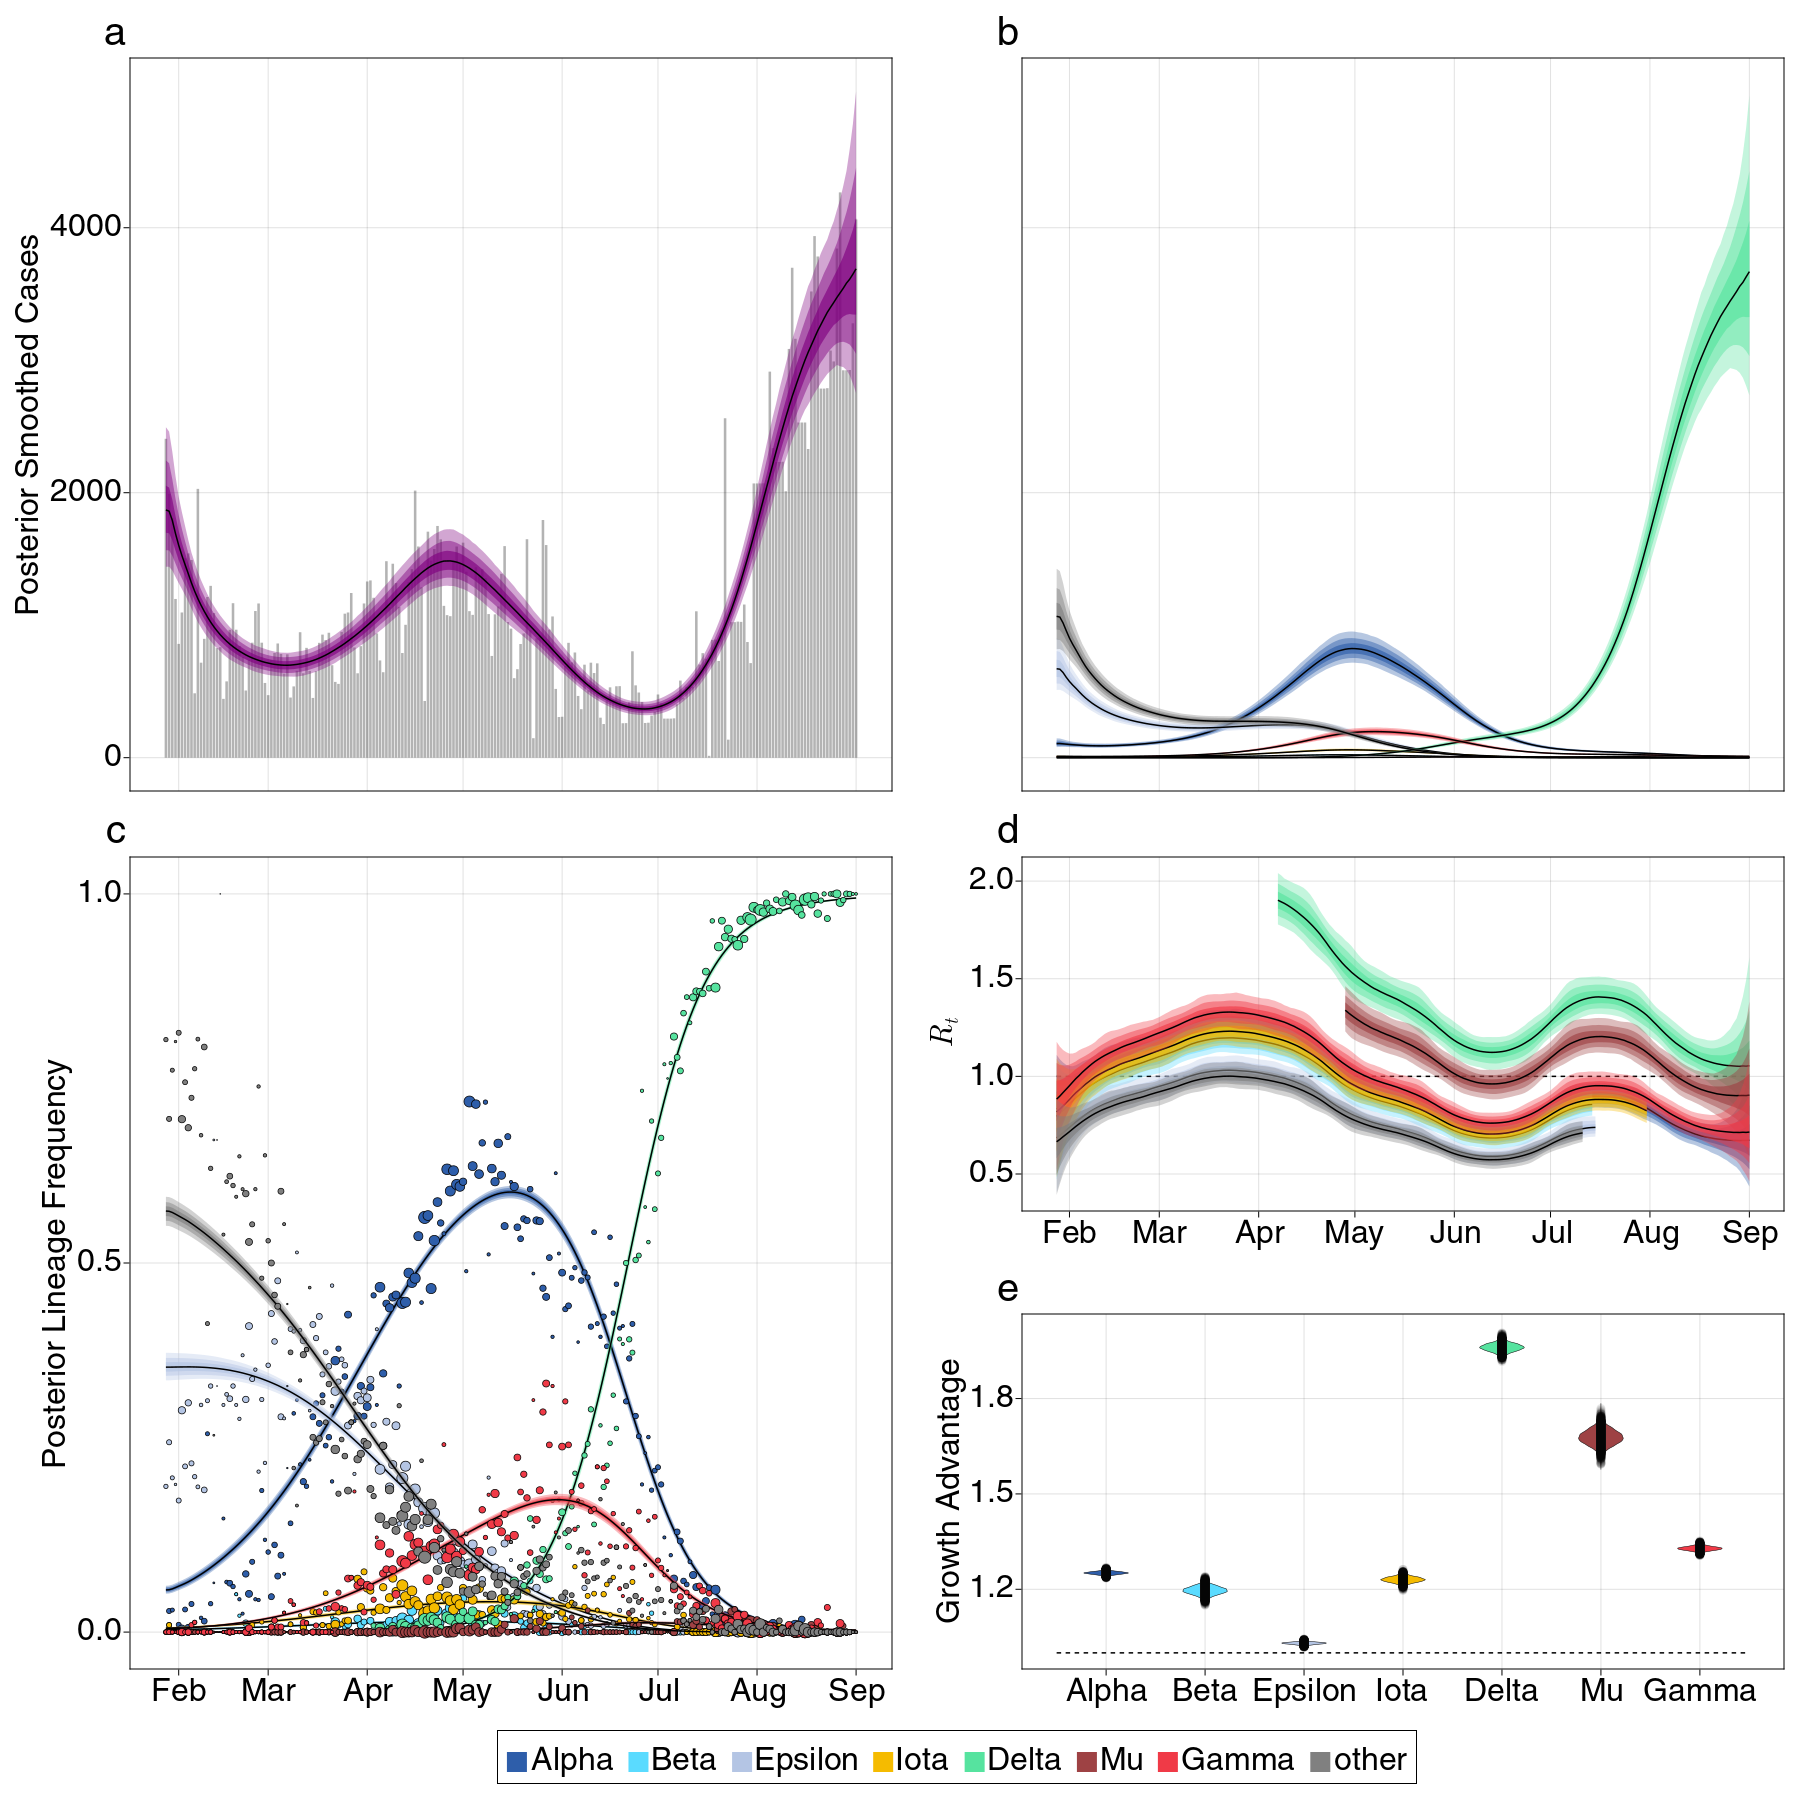

In [55]:
fig_2_A = make_fig_2("Washington", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


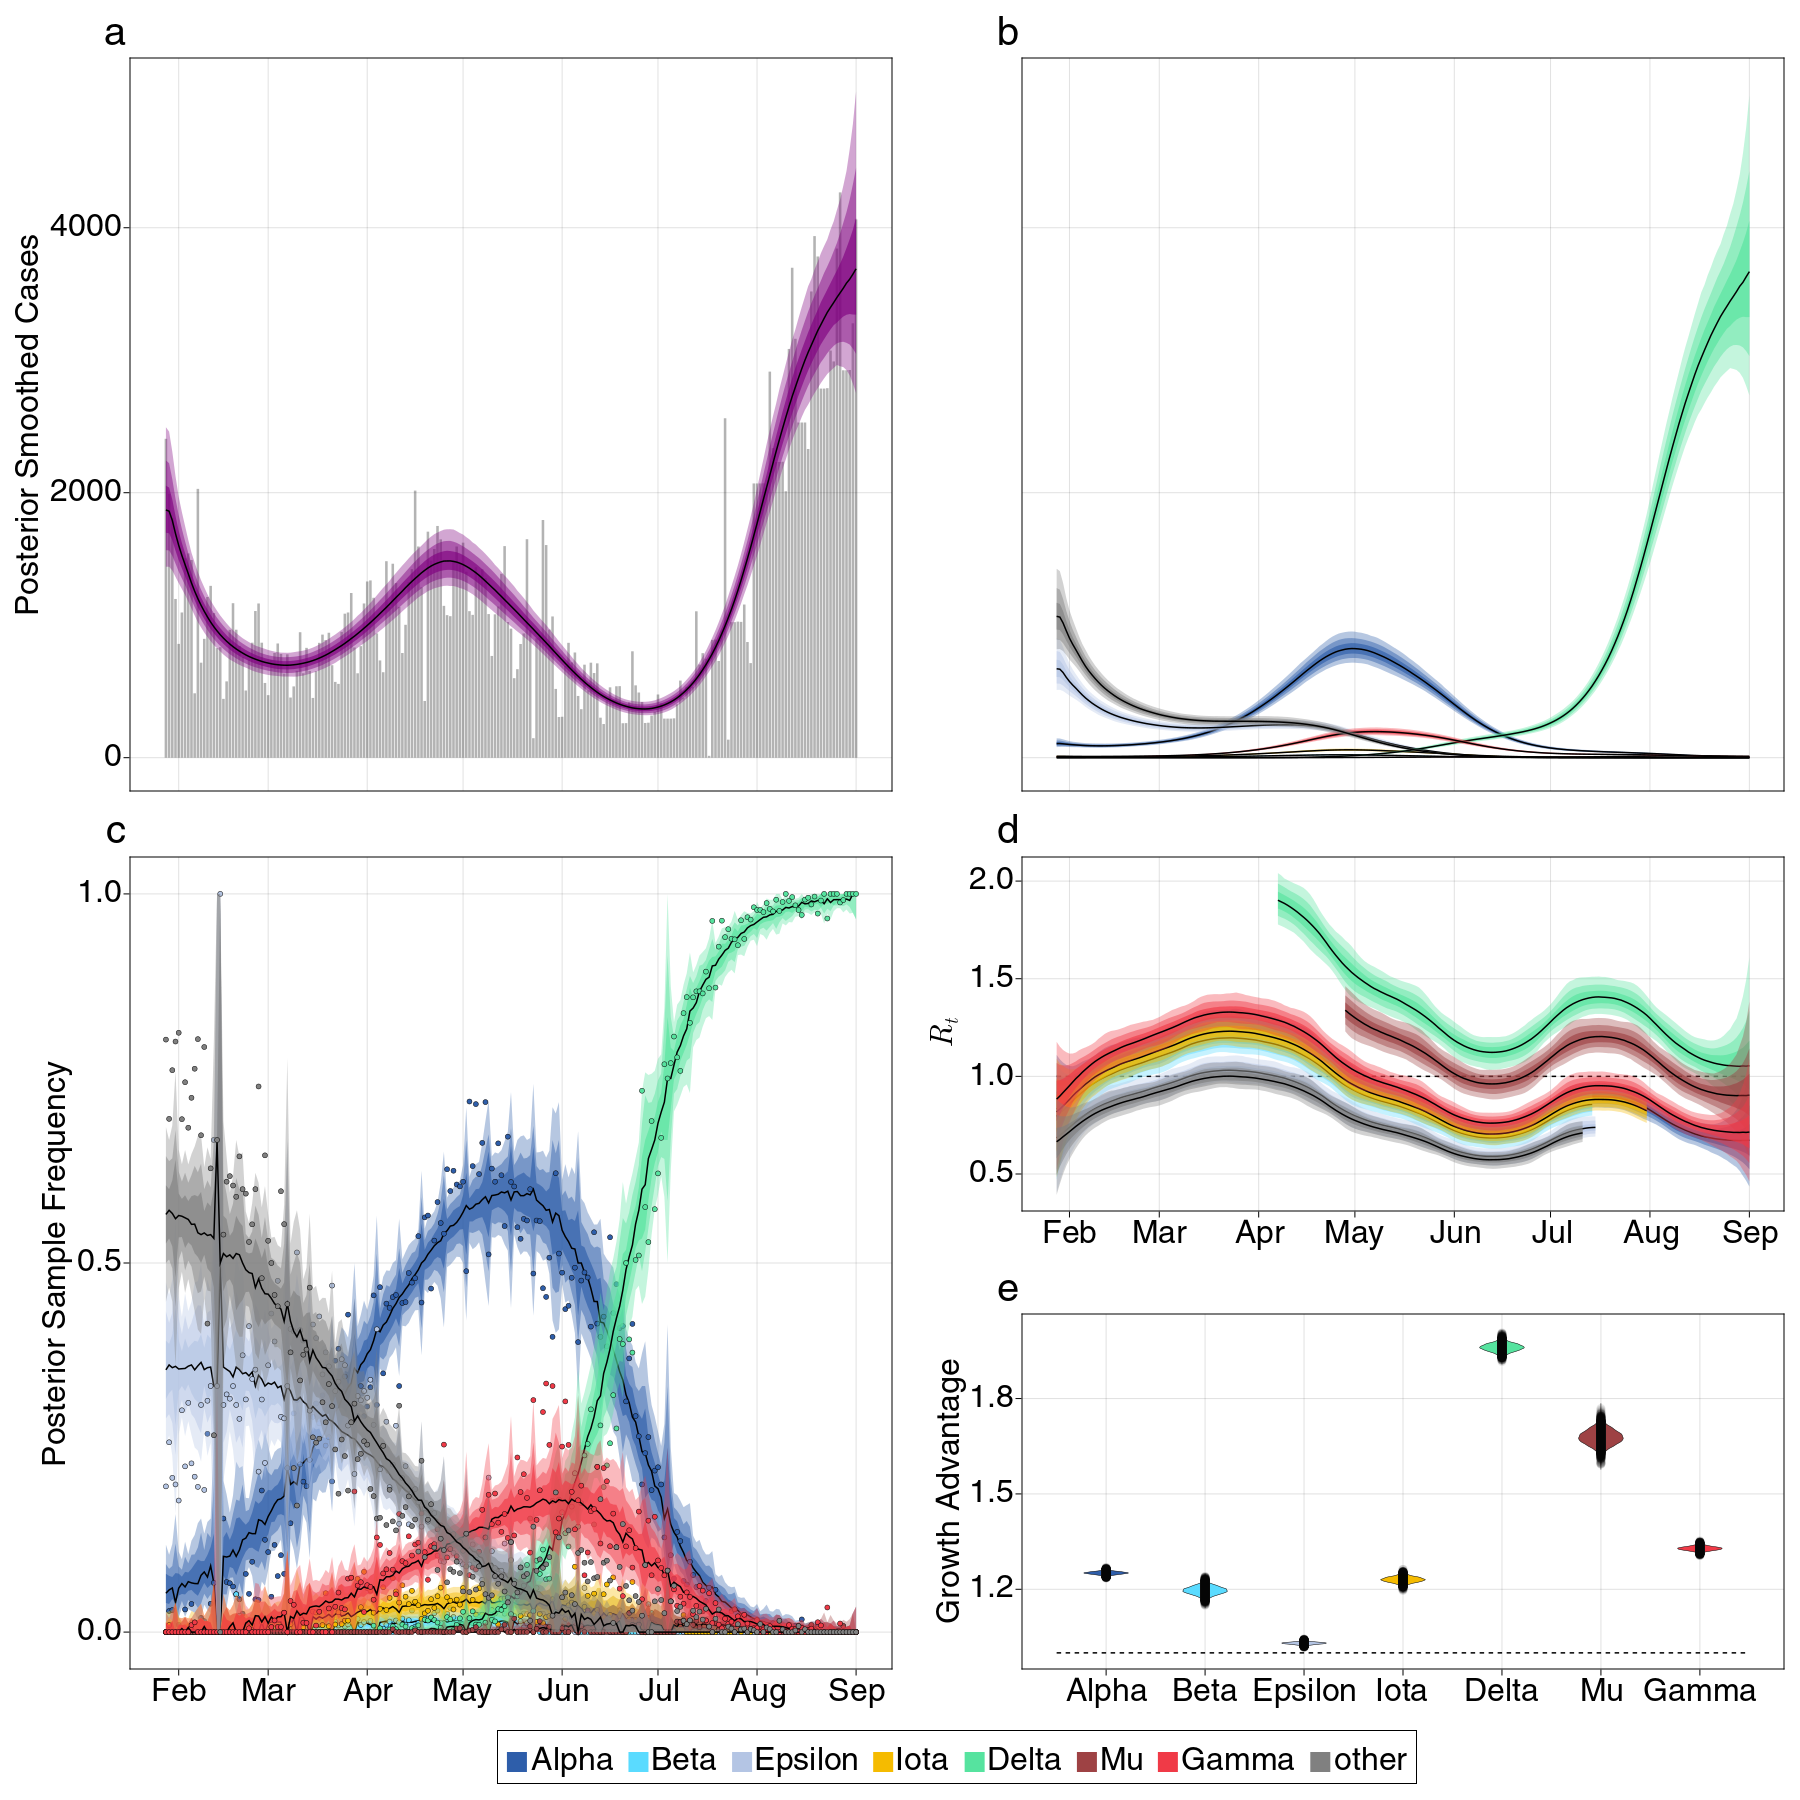

In [56]:
fig_2_B = make_fig_2("Washington", states_dict, true)

In [ ]:
save("../manuscript/figs/fig_2_version_A.png", fig_2_A)
save("../manuscript/figs/fig_2_version_B.png", fig_2_B)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


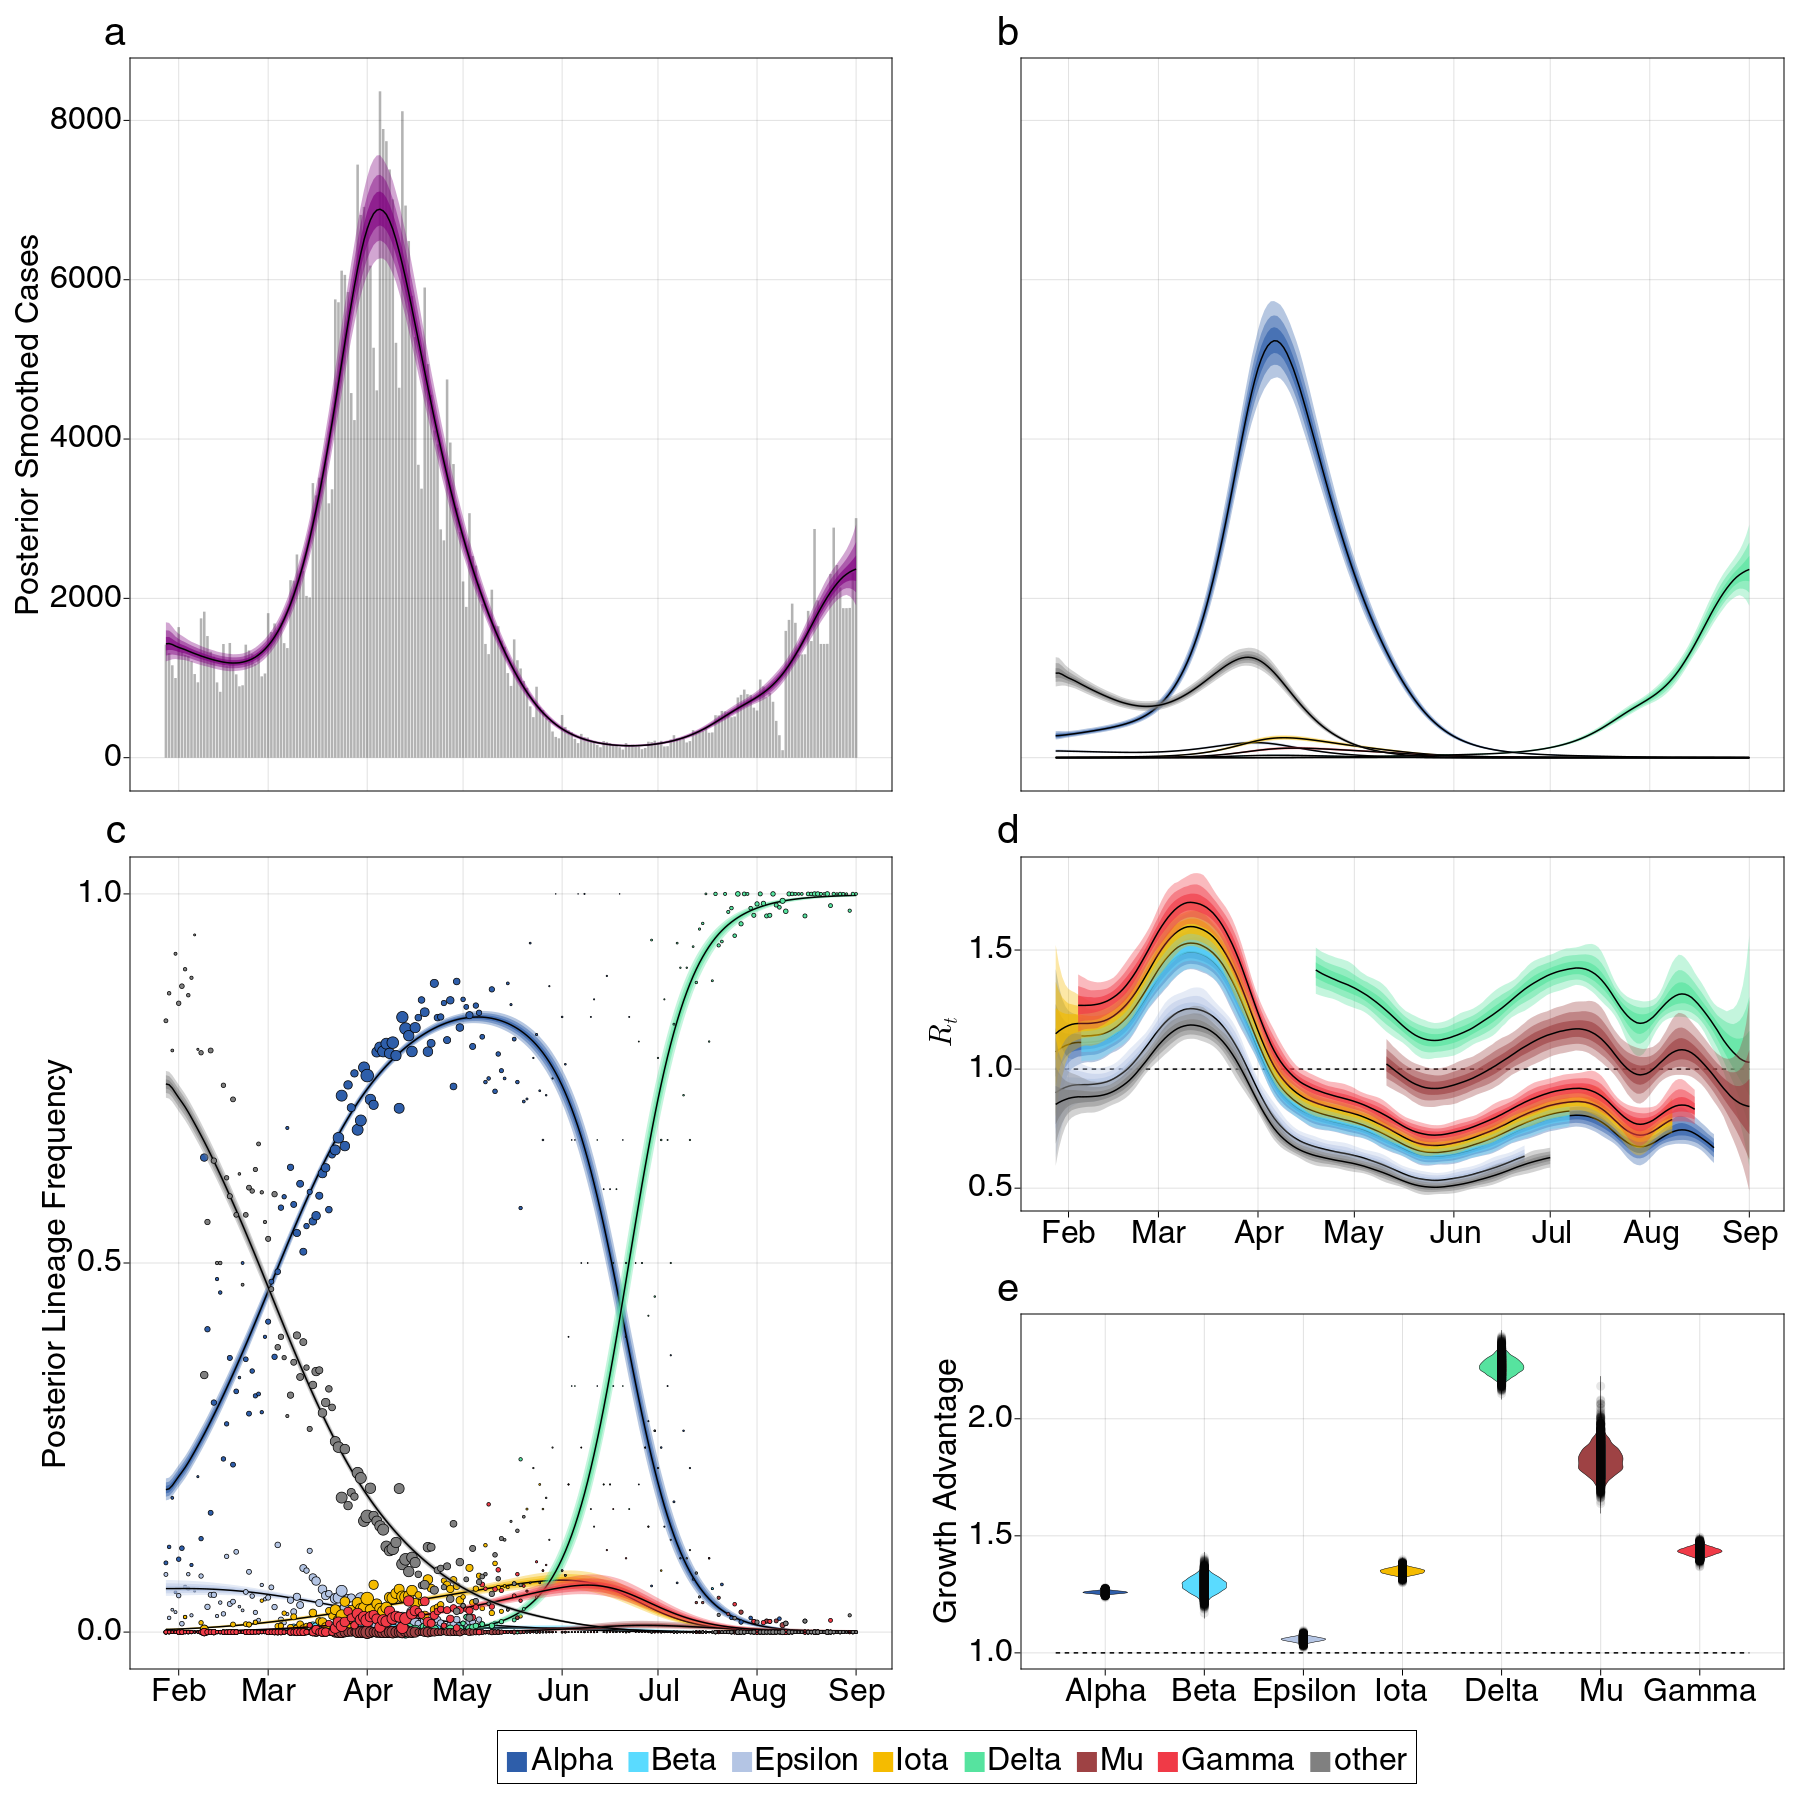

In [57]:
make_fig_2("Michigan", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


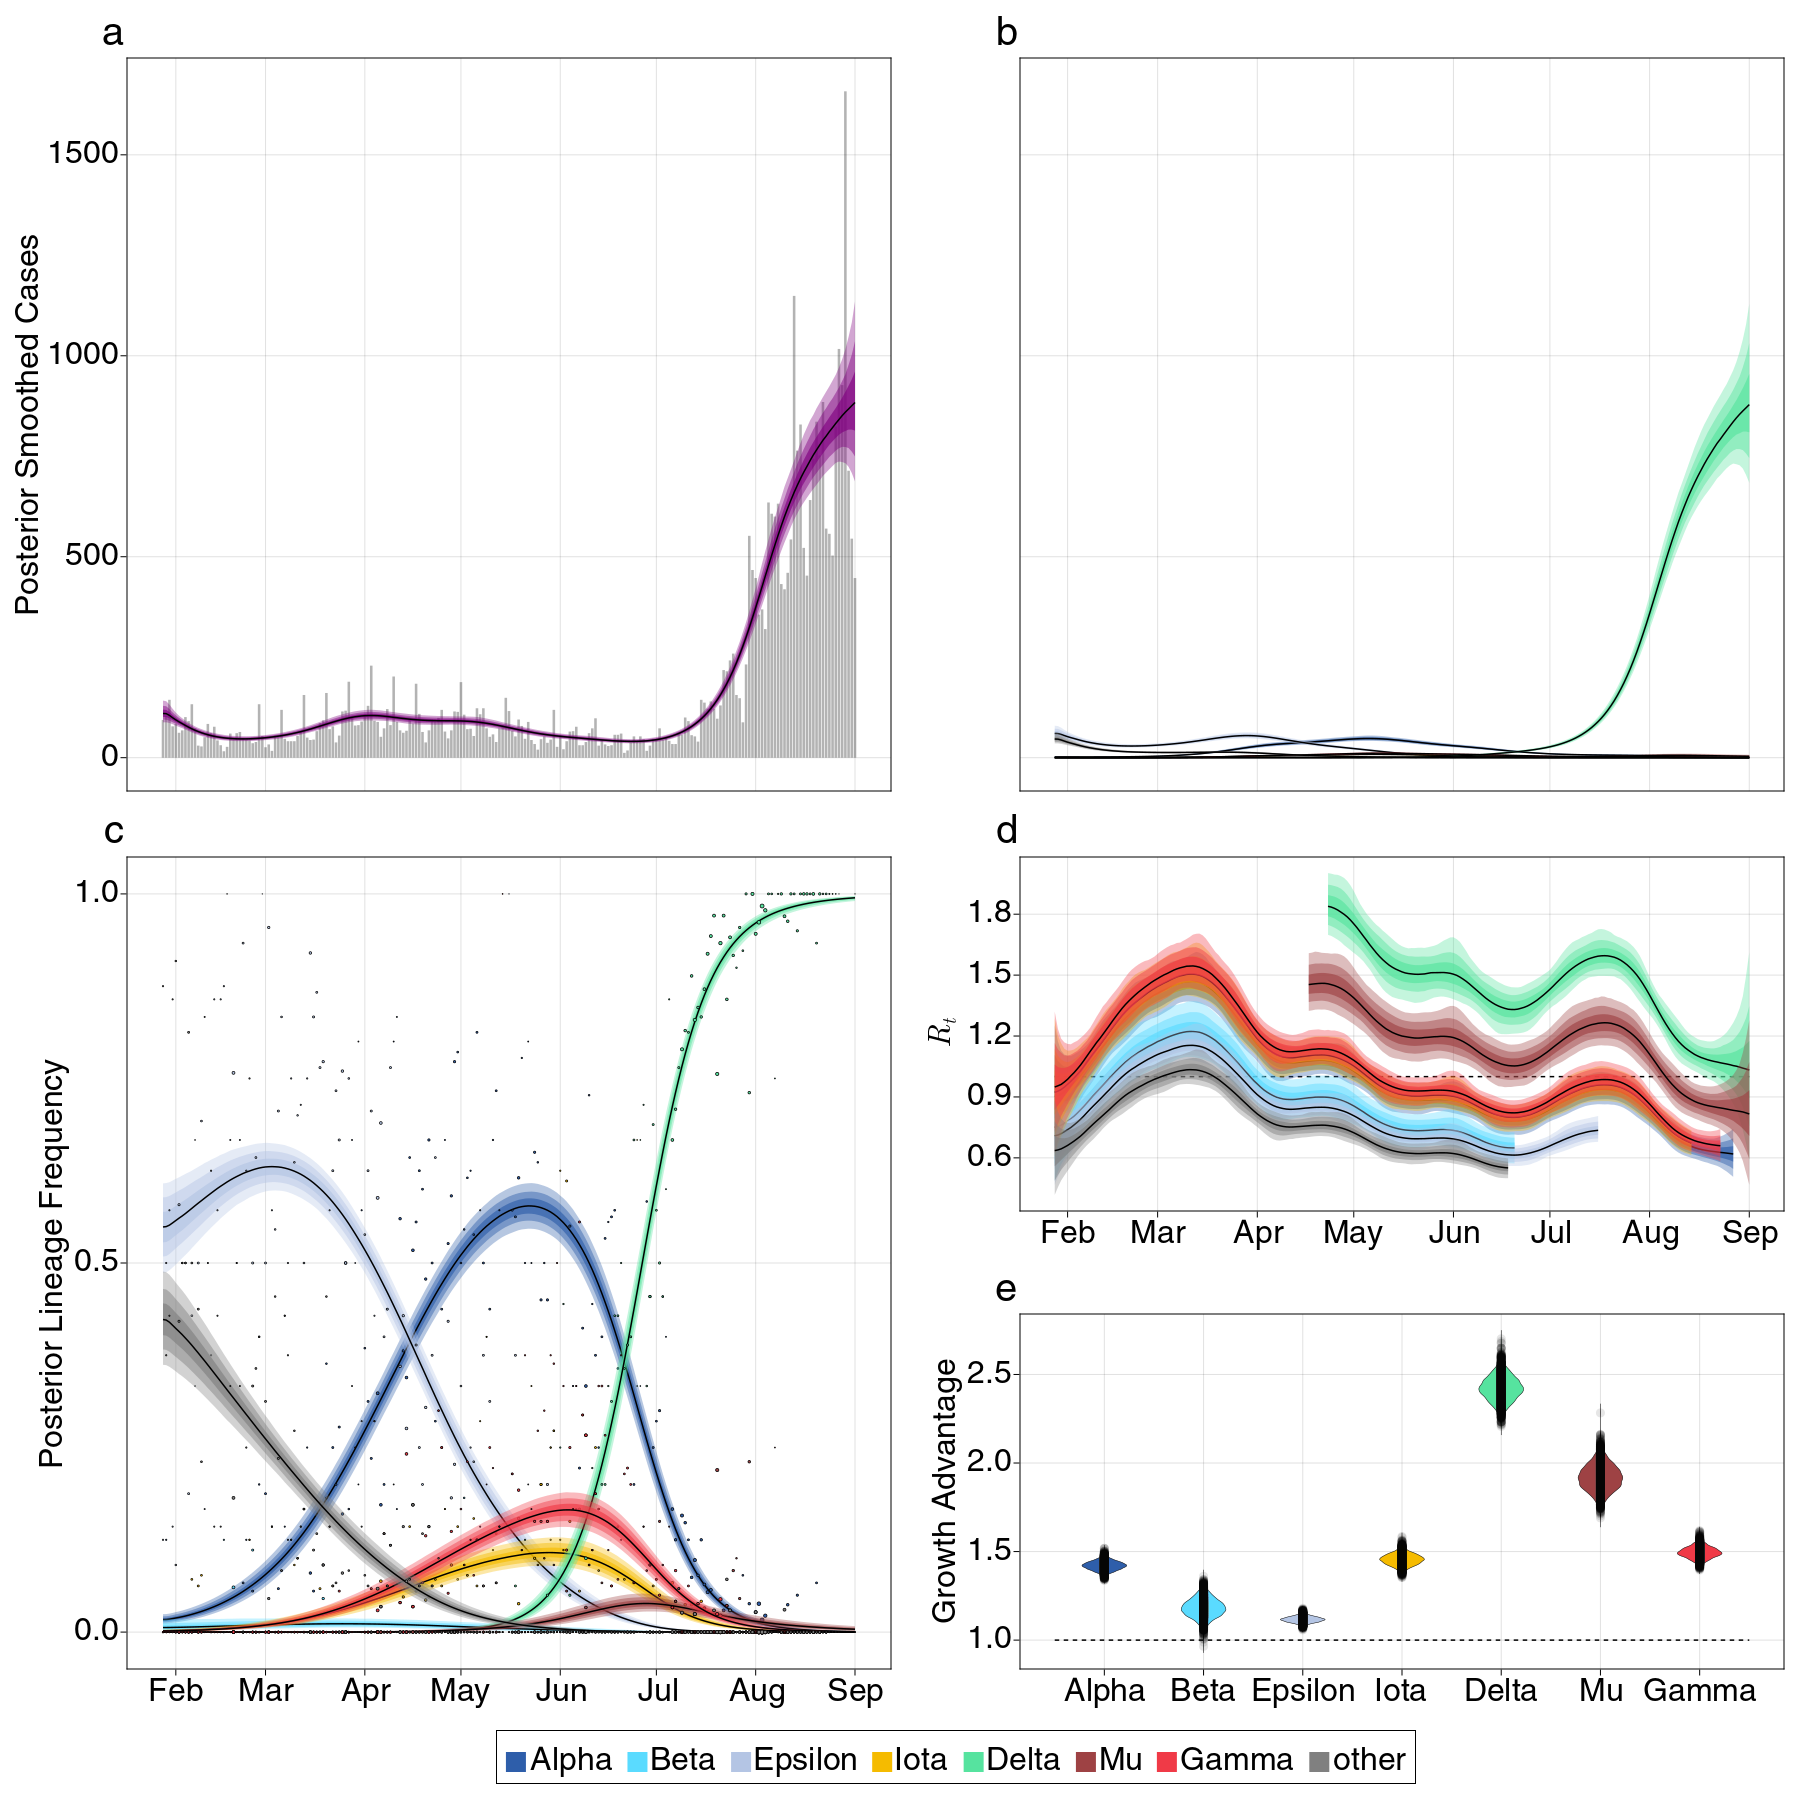

In [58]:
make_fig_2("Hawaii", states_dict, false)

Made smoothed I_prev
Made frequencies plots
Made posterior lineage I_prev
Made Rt
Made Growth


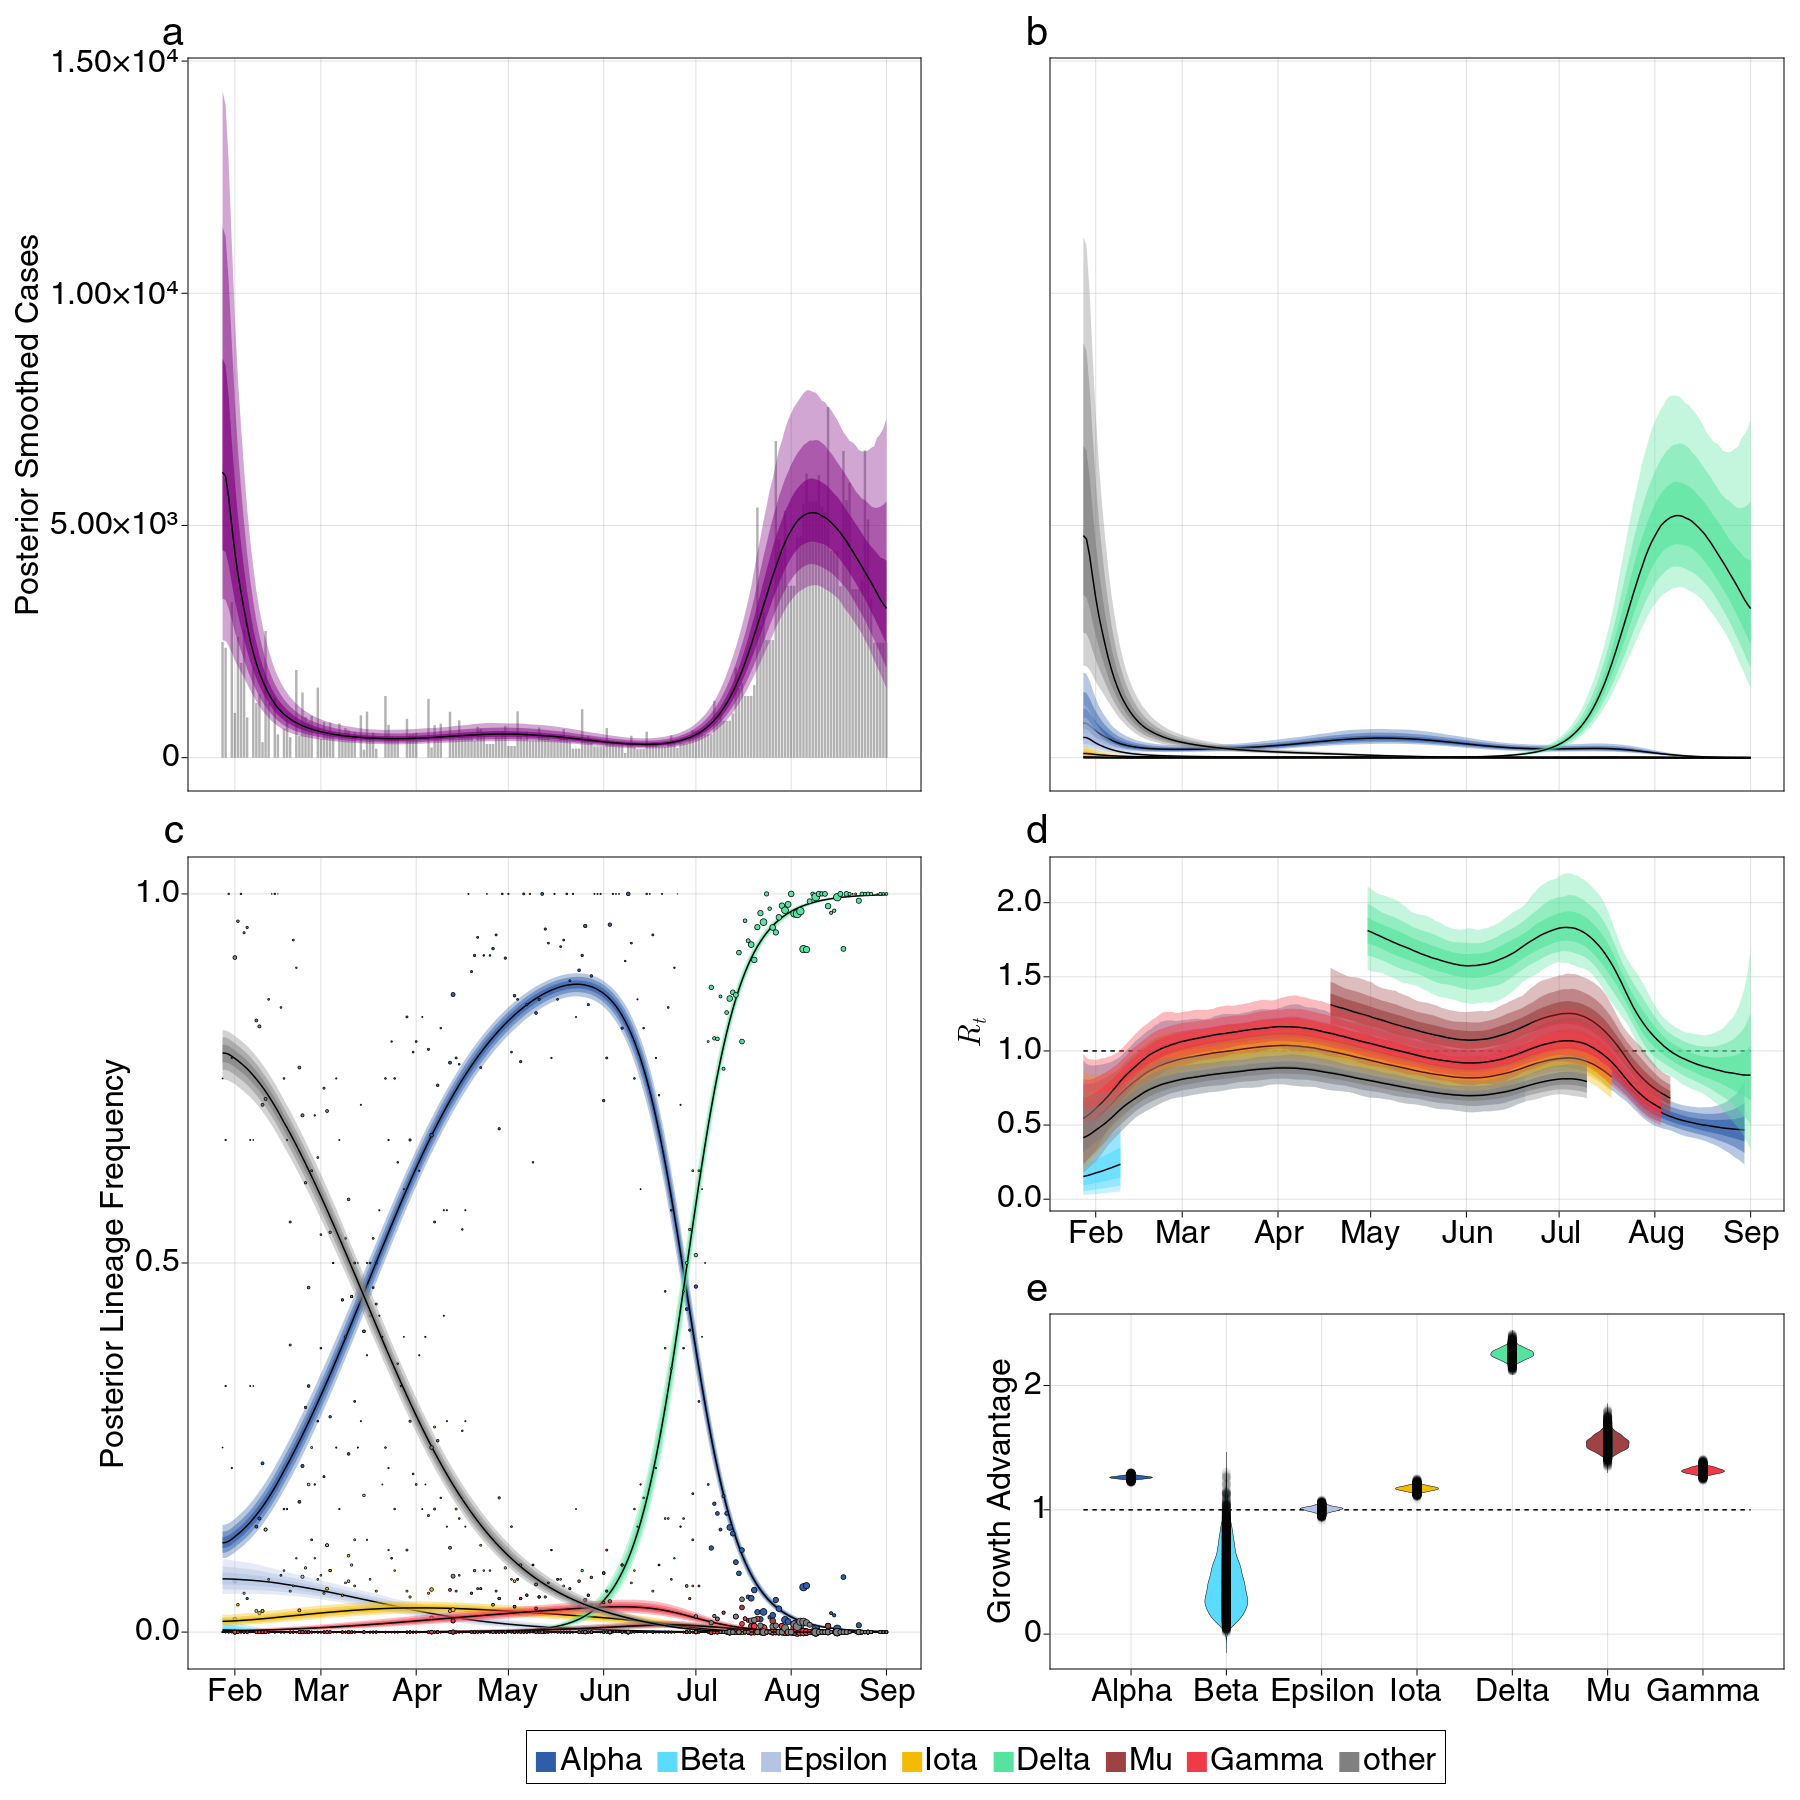

In [59]:
make_fig_2("Louisiana", states_dict, false)

In [ ]:
fig_2S_NY = make_fig_2("New_York", states_dict, false)

In [ ]:
save("../manuscript/figs/fig_2S_NY.png", fig_2S_NY)

## Figure 3: Looking across all states

In [ ]:
growth_df = CSV.read("../data/sims/results/09_23_21/inferred_lineage_growth_advantage_09_23_2021.tsv", DataFrame)

In [ ]:
state_names = sort(unique(growth_df.state))
clean_state_names = replace.(state_names, "_" => " ")

In [ ]:
function states_to_ordering(state)
   findfirst(s -> s==state, state_names)
end

In [ ]:
function make_figure_3()
    fig = Figure(backgroundcolor = RGBf0(1., 1., 1.), resolution = (2400, 2000), fontsize = 36, font = "Helvetica")
    g_growth_all = fig[1:3, 1] = GridLayout()
    ax_growth_all = Axis(g_growth_all[1,1],xlabel = "Inferred Growth Advantage")

    vlines!(ax_growth_all, [1.], color = :black, linewidth = 2.5, linestyle = :dash)
    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        this_lineage = filter(row -> row.lineage == name, growth_df)
    
        # Plot 80_CI
        rangebars!(ax_growth_all, 
            states_to_ordering.(this_lineage.state), 
            this_lineage.v_lower_80, 
            this_lineage.v_upper_80,
            direction = :x, 
            color = (this_color, 1.0),
            linewidth = 4)
    
        # Plot 50_CI
        rangebars!(ax_growth_all, 
            states_to_ordering.(this_lineage.state), 
            this_lineage.v_lower_50, 
            this_lineage.v_upper_50,
            direction = :x,
            color = (this_color, 1.0),
            linewidth = 6)
    end

    for (lineage, name) in enumerate(seq_labels[1:end-1])
        this_color = lineage_colors[lineage_map[name]]
        this_lineage = filter(row -> row.lineage == name, growth_df)
    
        # Plot median
        scatter!(ax_growth_all, 
            this_lineage.v_median, 
            states_to_ordering.(this_lineage.state), 
            color = this_color,
            strokewidth = 3.5,
            markersize = 18.)
    end

    ax_growth_all.xticks = 0:0.5:3
    ax_growth_all.yticks = 1:length(state_names)
    ax_growth_all.ytickformat = ys -> clean_state_names[convert.(Int,ys)]
    ax_growth_all.yreversed = true

    # Growth Advantage medians
    g_growth_meds = fig[1, 2] = GridLayout()
    ax_growth_meds = Axis(g_growth_meds[1,1],ylabel = "Median Growth Advantage")

    hlines!(ax_growth_meds, [1.], color = :black, linewidth = 2.5, linestyle = :dash)
    lineage_nums = [lineage_map[lin] for lin in growth_df.lineage]
    lineage_cols = [lineage_colors[lin] for lin in lineage_nums]

    violin!(ax_growth_meds, lineage_nums, growth_df.v_median, 
        datalimits = extrema, 
        color = lineage_cols,
        orientation = :horizontal,
        strokewidth = 1.5)

    scatter!(ax_growth_meds, lineage_nums, growth_df.v_median, 
        color = lineage_cols,
        strokewidth = 2.5)

    ax_growth_meds.xticks = 1:(length(seq_labels)-1)
    ax_growth_meds.xtickformat = xs -> WHO_seq_names[convert.(Int,xs)]

    # Adding legend
    elements = [PolyElement(polycolor = lineage_colors[lineage_map[l]]) for l in seq_labels]
    fig[2,2] = Legend(fig, elements, WHO_seq_names, "", orientation = :horizontal, tellwidth = false, tellheight = true)

    for (label, layout) in zip(["a", "b"], [g_growth_all, g_growth_meds])
    Label(layout[1, 1, TopLeft()], label,
        textsize = 50,
        padding = (0, 5, 5, 0),
        font = "Helvetica Bold",
        halign = :right)
    end
    fig 
end

fig_3 = make_figure_3()

In [ ]:
save("../manuscript/figs/fig_3_growth_advantages.png", fig_3)

## Figure 4: Vaccination Histograms